# Tutorial 2: Spatial Connectivity

This tutorial explores spatial connectivity patterns in `braintools.conn`. You'll learn how to create distance-dependent connections, work with neuron positions, and model spatially-organized neural networks.

## 1. Introduction to Spatial Connectivity <a name="introduction"></a>

Real neural circuits are embedded in physical space, and connectivity often depends on spatial relationships between neurons.

### Why Spatial Connectivity Matters

- **Biological Realism**: Real neurons connect based on proximity and spatial organization
- **Local vs. Global Processing**: Nearby neurons process local features; distant neurons integrate information
- **Wiring Cost**: Brains minimize connection lengths to reduce metabolic cost
- **Topographic Maps**: Sensory and motor systems maintain spatial relationships (e.g., retinotopy, somatotopy)

Let's start by importing the necessary libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import brainunit as u
from braintools import conn, visualize as vis
from braintools.init import Constant, Normal, Uniform, GaussianProfile, ExponentialProfile

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['font.size'] = 10

print("✓ Imports successful")

✓ Imports successful


---

## 2. Working with Neuron Positions <a name="positions"></a>

Spatial connectivity requires neuron positions. `braintools.conn` uses position arrays with physical units.

### 2.1 Creating Position Arrays

Positions are typically 2D or 3D arrays with shape `(n_neurons, n_dimensions)`:

In [2]:
# Random 2D positions
n_neurons = 100
positions_2d = np.random.uniform(0, 1000, (n_neurons, 2)) * u.um

print("2D Positions:")
print(f"  Shape: {positions_2d.shape}")
print(f"  Units: {u.get_unit(positions_2d)}")
print(f"  First 5 neurons:\n{positions_2d[:5]}")

# 1D positions (e.g., for linear arrays)
positions_1d = np.linspace(0, 1000, n_neurons).reshape(-1, 1) * u.um

print(f"\n1D Positions:")
print(f"  Shape: {positions_1d.shape}")

# 3D positions (e.g., for cortical volumes)
positions_3d = np.random.randn(n_neurons, 3) * np.array([100, 100, 200]) * u.um

print(f"\n3D Positions:")
print(f"  Shape: {positions_3d.shape}")

2D Positions:
  Shape: (100, 2)
  Units: um
  First 5 neurons:
ArrayImpl([[374.54013062, 950.71429443],
           [731.99395752, 598.6585083],
           [156.01864624, 155.99452209],
           [ 58.08361053, 866.17614746],
           [601.11499023, 708.0725708]], dtype=float32) * umetre

1D Positions:
  Shape: (100, 1)

3D Positions:
  Shape: (100, 3)


### 2.2 Visualizing Neuron Positions

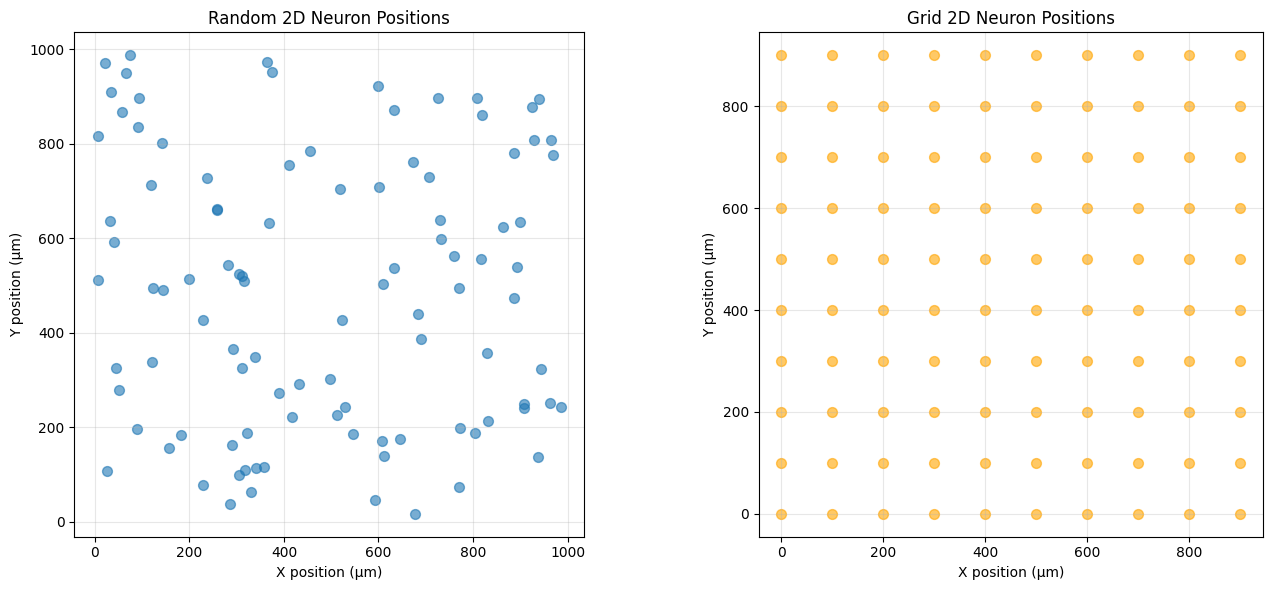

In [3]:
# Visualize 2D positions
pos_2d_vals = u.get_mantissa(positions_2d)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Random distribution
axes[0].scatter(pos_2d_vals[:, 0], pos_2d_vals[:, 1], alpha=0.6, s=50)
axes[0].set_xlabel('X position (μm)')
axes[0].set_ylabel('Y position (μm)')
axes[0].set_title('Random 2D Neuron Positions')
axes[0].grid(True, alpha=0.3)
axes[0].set_aspect('equal')

# Grid distribution (we'll create this)
grid_size = 10
x = np.linspace(0, 900, grid_size)
y = np.linspace(0, 900, grid_size)
xx, yy = np.meshgrid(x, y)
positions_grid = np.stack([xx.flatten(), yy.flatten()], axis=1) * u.um
pos_grid_vals = u.get_mantissa(positions_grid)

axes[1].scatter(pos_grid_vals[:, 0], pos_grid_vals[:, 1], alpha=0.6, s=50, color='orange')
axes[1].set_xlabel('X position (μm)')
axes[1].set_ylabel('Y position (μm)')
axes[1].set_title('Grid 2D Neuron Positions')
axes[1].grid(True, alpha=0.3)
axes[1].set_aspect('equal')

plt.tight_layout()
plt.show()

---

## 3. Distance-Dependent Connectivity <a name="distance-dependent"></a>

Distance-dependent connectivity creates connections with probability that depends on spatial distance.

### 3.1 Gaussian Distance Profile

Gaussian profiles create smooth, locally-biased connectivity:

In [4]:
# Create positions
n_neurons = 200
positions = np.random.uniform(0, 1000, (n_neurons, 2)) * u.um

# Gaussian distance-dependent connectivity
gaussian_conn = conn.Gaussian(
    distance_profile=GaussianProfile(
        sigma=100 * u.um,          # Connection probability peaks at zero distance
        max_distance=300 * u.um    # No connections beyond this distance
    ),
    weight=Constant(1.0 * u.nS),
    seed=42
)

result_gaussian = gaussian_conn(
    pre_size=n_neurons,
    post_size=n_neurons,
    pre_positions=positions,
    post_positions=positions
)

print("Gaussian Distance-Dependent Connectivity:")
print("=" * 50)
print(f"Neurons: {n_neurons}")
print(f"Connections: {len(result_gaussian.pre_indices)}")
print(f"Sigma: 100 μm")
print(f"Max distance: 300 μm")
print(f"Average connections per neuron: {len(result_gaussian.pre_indices) / n_neurons:.1f}")

Gaussian Distance-Dependent Connectivity:
Neurons: 200
Connections: 2520
Sigma: 100 μm
Max distance: 300 μm
Average connections per neuron: 12.6


### 3.2 Exponential Distance Profile

Exponential profiles create connections that decay exponentially with distance:

In [5]:
# Exponential distance-dependent connectivity
exponential_conn = conn.Exponential(
    distance_profile=ExponentialProfile(
        150 * u.um,          # Decay length scale
        max_distance=500 * u.um    # Maximum connection distance
    ),
    weight=Constant(1.5 * u.nS),
    seed=42
)

result_exponential = exponential_conn(
    pre_size=n_neurons,
    post_size=n_neurons,
    pre_positions=positions,
    post_positions=positions
)

print("Exponential Distance-Dependent Connectivity:")
print("=" * 50)
print(f"Neurons: {n_neurons}")
print(f"Connections: {len(result_exponential.pre_indices)}")
print(f"Scale: 150 μm")
print(f"Max distance: 500 μm")
print(f"Average connections per neuron: {len(result_exponential.pre_indices) / n_neurons:.1f}")

Exponential Distance-Dependent Connectivity:
Neurons: 200
Connections: 3936
Scale: 150 μm
Max distance: 500 μm
Average connections per neuron: 19.7


### 3.3 Comparing Distance Profiles

Let's visualize how connection probability varies with distance:

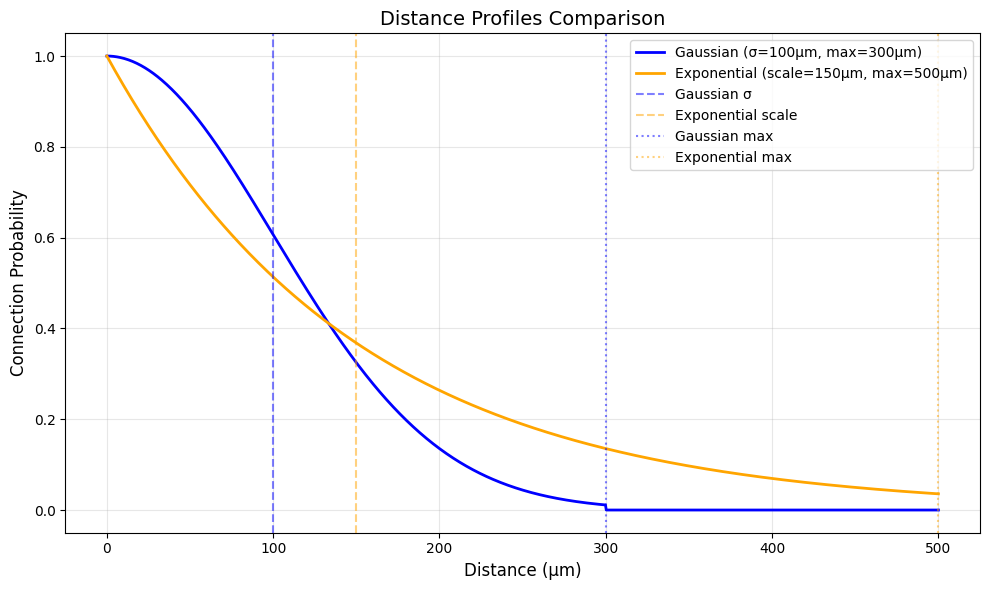


Key Differences:
- Gaussian: Smooth, bell-shaped, stronger local bias
- Exponential: Slower decay, allows more long-range connections


In [6]:
# Create distance arrays for plotting
distances = np.linspace(0, 500, 1000) * u.um
dist_vals = u.get_mantissa(distances)

# Gaussian profile
sigma = 100
gaussian_prob = np.exp(-(dist_vals ** 2) / (2 * sigma ** 2))
gaussian_prob[dist_vals > 300] = 0  # Max distance cutoff

# Exponential profile
scale = 150
exponential_prob = np.exp(-dist_vals / scale)
exponential_prob[dist_vals > 500] = 0  # Max distance cutoff

# Plot comparison
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(dist_vals, gaussian_prob, label='Gaussian (σ=100μm, max=300μm)', 
        linewidth=2, color='blue')
ax.plot(dist_vals, exponential_prob, label='Exponential (scale=150μm, max=500μm)', 
        linewidth=2, color='orange')

ax.axvline(100, color='blue', linestyle='--', alpha=0.5, label='Gaussian σ')
ax.axvline(150, color='orange', linestyle='--', alpha=0.5, label='Exponential scale')
ax.axvline(300, color='blue', linestyle=':', alpha=0.5, label='Gaussian max')
ax.axvline(500, color='orange', linestyle=':', alpha=0.5, label='Exponential max')

ax.set_xlabel('Distance (μm)', fontsize=12)
ax.set_ylabel('Connection Probability', fontsize=12)
ax.set_title('Distance Profiles Comparison', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Differences:")
print("- Gaussian: Smooth, bell-shaped, stronger local bias")
print("- Exponential: Slower decay, allows more long-range connections")

### 3.4 Connection Distance Distribution

Let's analyze the actual distances of connections created:

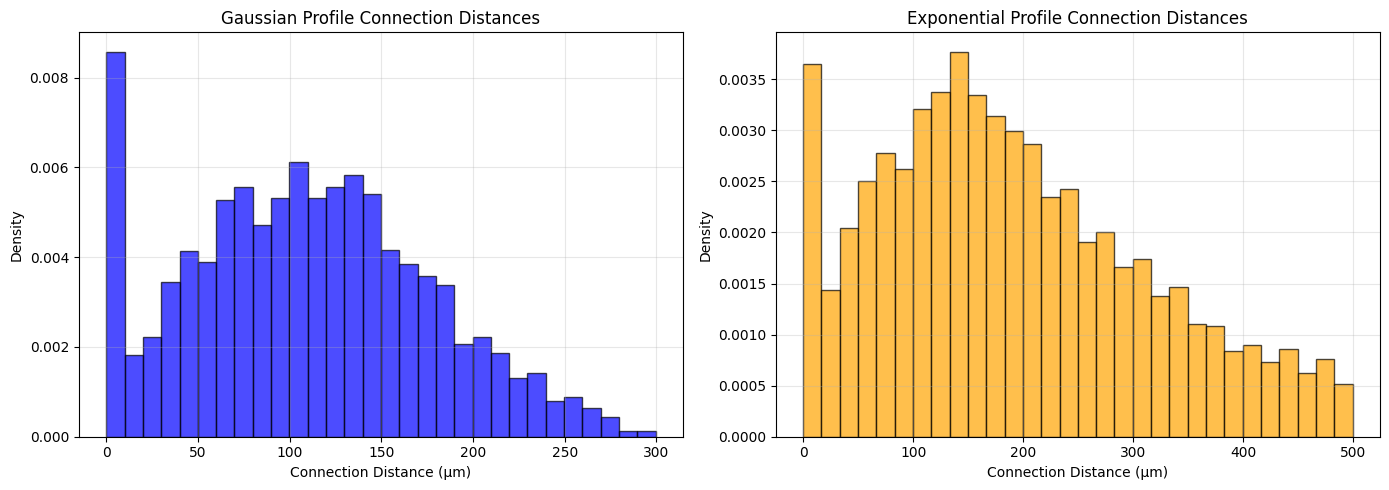


Gaussian - Mean distance: 109.7 μm
Exponential - Mean distance: 191.0 μm


In [8]:
# Calculate connection distances
def calculate_connection_distances(result, positions):
    """Calculate Euclidean distances for all connections."""
    pos_vals = u.get_mantissa(positions)
    pre_pos = pos_vals[result.pre_indices]
    post_pos = pos_vals[result.post_indices]
    distances = np.sqrt(np.sum((pre_pos - post_pos) ** 2, axis=1))
    return distances

# Calculate distances for both profiles
distances_gaussian = calculate_connection_distances(result_gaussian, positions)
distances_exponential = calculate_connection_distances(result_exponential, positions)

# Plot distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

vis.distribution_plot(
    distances_gaussian,
    bins=30,
    alpha=0.7,
    colors=['blue',],
    edgecolor='black',
    ax=axes[0],
    xlabel='Connection Distance (μm)',
    title='Gaussian Profile Connection Distances'
)

vis.distribution_plot(
    distances_exponential,
    bins=30,
    alpha=0.7,
    colors=['orange',],
    edgecolor='black',
    ax=axes[1],
    xlabel='Connection Distance (μm)',
    title='Exponential Profile Connection Distances'
)

plt.tight_layout()
plt.show()

print(f"\nGaussian - Mean distance: {np.mean(distances_gaussian):.1f} μm")
print(f"Exponential - Mean distance: {np.mean(distances_exponential):.1f} μm")

---

## 4. Spatial Topologies <a name="topologies"></a>

Spatial topologies impose regular connectivity patterns based on position in space.

### 4.1 Ring Topology

Ring topology connects neurons in a circular arrangement, useful for modeling orientation preference or phase:

In [9]:
# Create ring connectivity
n_neurons_ring = 100

ring_conn = conn.Ring(
    neighbors=3,  # Connect to 3 neighbors on each side
    weight=Constant(1.0 * u.nS),
    bidirectional=True
)

result_ring = ring_conn(pre_size=n_neurons_ring, post_size=n_neurons_ring)

print("Ring Topology:")
print("=" * 50)
print(f"Neurons: {n_neurons_ring}")
print(f"Neighbors on each side: 3")
print(f"Bidirectional: Yes")
print(f"Total connections: {len(result_ring.pre_indices)}")
print(f"Expected: {n_neurons_ring * 3 * 2} (100 neurons × 3 neighbors × 2 directions)")

Ring Topology:
Neurons: 100
Neighbors on each side: 3
Bidirectional: Yes
Total connections: 600
Expected: 600 (100 neurons × 3 neighbors × 2 directions)


### 4.2 Grid2D Topology

2D grid connectivity connects neurons to their spatial neighbors:

In [10]:
# Von Neumann neighborhood (4 neighbors)
grid_von_neumann = conn.Grid2d(
    connectivity='von_neumann',
    weight=Constant(1.0 * u.nS),
    periodic=False
)

result_von_neumann = grid_von_neumann(pre_size=(10, 10), post_size=(10, 10))

print("Grid2D - Von Neumann (4-connected):")
print("=" * 50)
print(f"Grid size: 10 × 10 = 100 neurons")
print(f"Connectivity: Von Neumann (up, down, left, right)")
print(f"Periodic boundaries: No")
print(f"Total connections: {len(result_von_neumann.pre_indices)}")

# Moore neighborhood (8 neighbors)
grid_moore = conn.Grid2d(
    connectivity='moore',
    weight=Constant(1.5 * u.nS),
    periodic=False
)

result_moore = grid_moore(pre_size=(10, 10), post_size=(10, 10))

print(f"\nGrid2D - Moore (8-connected):")
print("=" * 50)
print(f"Grid size: 10 × 10 = 100 neurons")
print(f"Connectivity: Moore (all 8 neighbors)")
print(f"Periodic boundaries: No")
print(f"Total connections: {len(result_moore.pre_indices)}")

Grid2D - Von Neumann (4-connected):
Grid size: 10 × 10 = 100 neurons
Connectivity: Von Neumann (up, down, left, right)
Periodic boundaries: No
Total connections: 360

Grid2D - Moore (8-connected):
Grid size: 10 × 10 = 100 neurons
Connectivity: Moore (all 8 neighbors)
Periodic boundaries: No
Total connections: 684


### 4.3 Periodic vs. Non-Periodic Boundaries

Periodic boundaries create a torus topology (wraparound edges):

In [11]:
# Non-periodic (has edges)
grid_nonperiodic = conn.Grid2d(
    connectivity='moore',
    periodic=False
)
result_nonperiodic = grid_nonperiodic(pre_size=(8, 8), post_size=(8, 8))

# Periodic (torus)
grid_periodic = conn.Grid2d(
    connectivity='moore',
    periodic=True
)
result_periodic = grid_periodic(pre_size=(8, 8), post_size=(8, 8))

# Calculate in-degrees to see edge effects
in_degree_nonperiodic = np.bincount(result_nonperiodic.post_indices, minlength=64)
in_degree_periodic = np.bincount(result_periodic.post_indices, minlength=64)

print("Periodic vs. Non-Periodic Boundaries:")
print("=" * 50)
print(f"Non-periodic (edges):")
print(f"  Total connections: {len(result_nonperiodic.pre_indices)}")
print(f"  Min in-degree: {np.min(in_degree_nonperiodic)} (corner neurons)")
print(f"  Max in-degree: {np.max(in_degree_nonperiodic)} (interior neurons)")
print(f"  Mean in-degree: {np.mean(in_degree_nonperiodic):.1f}")

print(f"\nPeriodic (torus):")
print(f"  Total connections: {len(result_periodic.pre_indices)}")
print(f"  Min in-degree: {np.min(in_degree_periodic)}")
print(f"  Max in-degree: {np.max(in_degree_periodic)}")
print(f"  Mean in-degree: {np.mean(in_degree_periodic):.1f}")
print(f"  All neurons have exactly 8 connections!")

Periodic vs. Non-Periodic Boundaries:
Non-periodic (edges):
  Total connections: 420
  Min in-degree: 3 (corner neurons)
  Max in-degree: 8 (interior neurons)
  Mean in-degree: 6.6

Periodic (torus):
  Total connections: 512
  Min in-degree: 8
  Max in-degree: 8
  Mean in-degree: 8.0
  All neurons have exactly 8 connections!


---

## 5. Clustered Connectivity Patterns <a name="clustered"></a>

Clustered connectivity creates spatially-localized groups with enhanced connectivity.

### 5.1 Clustered Random Connectivity

ClusteredRandom enhances connection probability within a spatial radius:

In [12]:
# Create positions
n_neurons = 300
positions = np.random.uniform(0, 1000, (n_neurons, 2)) * u.um

# Clustered random connectivity
clustered_conn = conn.ClusteredRandom(
    prob=0.05,                    # Baseline probability (5%)
    cluster_radius=100 * u.um,    # Radius of clustering
    cluster_factor=5.0,           # 5× enhancement within radius
    weight=Constant(1.0 * u.nS),
    seed=42
)

result_clustered = clustered_conn(
    pre_size=n_neurons,
    post_size=n_neurons,
    pre_positions=positions,
    post_positions=positions
)

print("Clustered Random Connectivity:")
print("=" * 50)
print(f"Neurons: {n_neurons}")
print(f"Baseline probability: 5%")
print(f"Cluster radius: 100 μm")
print(f"Enhancement factor: 5×")
print(f"Effective probability within clusters: {0.05 * 5 * 100:.0f}%")
print(f"Total connections: {len(result_clustered.pre_indices)}")

# Compare with pure random
random_conn = conn.Random(prob=0.05, seed=42)
result_random = random_conn(pre_size=n_neurons, post_size=n_neurons)

print(f"\nComparison with pure random (prob=0.05):")
print(f"  Pure random connections: {len(result_random.pre_indices)}")
print(f"  Clustered connections: {len(result_clustered.pre_indices)}")
print(f"  Increase: {(len(result_clustered.pre_indices) / len(result_random.pre_indices) - 1) * 100:.1f}%")

Clustered Random Connectivity:
Neurons: 300
Baseline probability: 5%
Cluster radius: 100 μm
Enhancement factor: 5×
Effective probability within clusters: 25%
Total connections: 5034

Comparison with pure random (prob=0.05):
  Pure random connections: 4444
  Clustered connections: 5034
  Increase: 13.3%


### 5.2 Radial Patches

RadialPatches creates multiple discrete patches of connectivity:

In [13]:
# Radial patches connectivity
patches_conn = conn.RadialPatches(
    patch_radius=60 * u.um,      # Radius of each patch
    n_patches=3,                 # Number of patches per neuron
    prob=0.7,                    # Connection probability within patches
    weight=Normal(mean=1.5 * u.nS, std=0.3 * u.nS),
    seed=42
)

result_patches = patches_conn(
    pre_size=n_neurons,
    post_size=n_neurons,
    pre_positions=positions,
    post_positions=positions
)

print("Radial Patches Connectivity:")
print("=" * 50)
print(f"Neurons: {n_neurons}")
print(f"Patches per neuron: 3")
print(f"Patch radius: 60 μm")
print(f"Connection prob within patches: 70%")
print(f"Total connections: {len(result_patches.pre_indices)}")
print(f"Average connections per neuron: {len(result_patches.pre_indices) / n_neurons:.1f}")

Radial Patches Connectivity:
Neurons: 300
Patches per neuron: 3
Patch radius: 60 μm
Connection prob within patches: 70%
Total connections: 2750
Average connections per neuron: 9.2


### 5.3 Comparing Clustered Patterns

Let's compare the distance distributions:

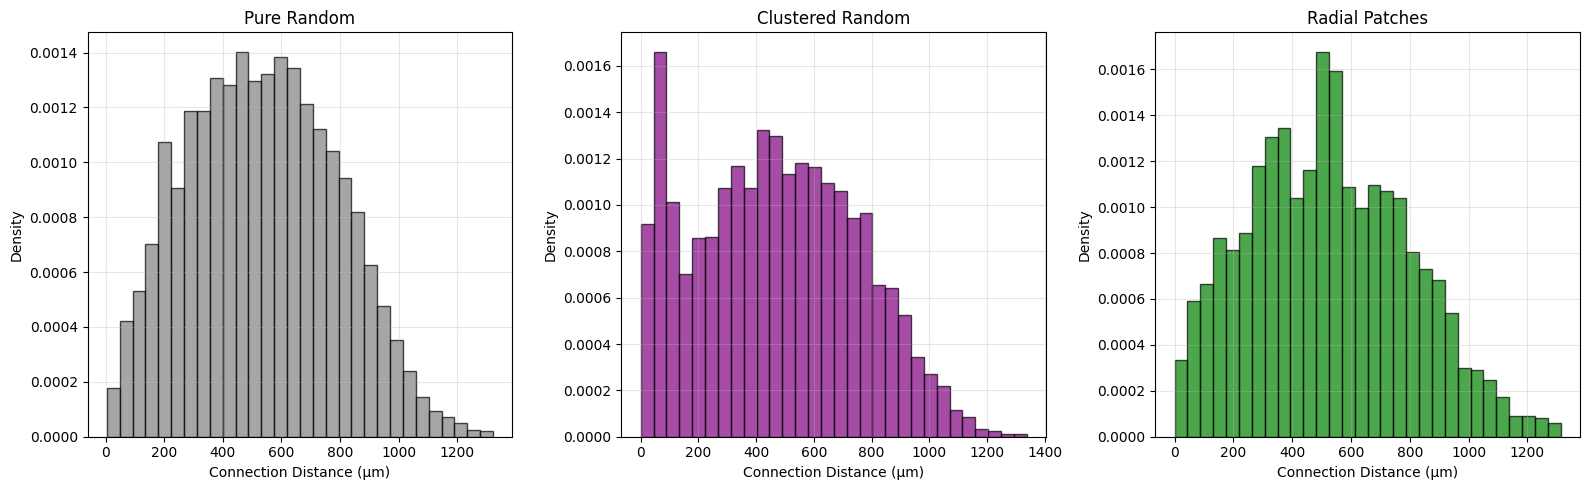


Mean Connection Distances:
  Pure Random: 534.0 μm
  Clustered Random: 471.2 μm
  Radial Patches: 525.5 μm

Note: Clustered patterns have shorter mean distances (local bias)


In [14]:
# Calculate distances for each pattern
distances_random = calculate_connection_distances(result_random, positions)
distances_clustered = calculate_connection_distances(result_clustered, positions)
distances_patches = calculate_connection_distances(result_patches, positions)

# Plot comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

vis.distribution_plot(
    distances_random,
    bins=30,
    alpha=0.7,
    colors=['gray'],
    edgecolor='black',
    ax=axes[0],
    xlabel='Connection Distance (μm)',
    title='Pure Random'
)

vis.distribution_plot(
    distances_clustered,
    bins=30,
    alpha=0.7,
    colors=['purple'],
    edgecolor='black',
    ax=axes[1],
    xlabel='Connection Distance (μm)',
    title='Clustered Random'
)

vis.distribution_plot(
    distances_patches,
    bins=30,
    alpha=0.7,
    colors=['green'],
    edgecolor='black',
    ax=axes[2],
    xlabel='Connection Distance (μm)',
    title='Radial Patches'
)

plt.tight_layout()
plt.show()

print("\nMean Connection Distances:")
print(f"  Pure Random: {np.mean(distances_random):.1f} μm")
print(f"  Clustered Random: {np.mean(distances_clustered):.1f} μm")
print(f"  Radial Patches: {np.mean(distances_patches):.1f} μm")
print("\nNote: Clustered patterns have shorter mean distances (local bias)")

---

## 6. Spatial Visualization Techniques <a name="visualization"></a>

Visualizing spatial connectivity reveals network structure.

### 6.1 Connection Length Maps

Visualize how connection distances vary across the network:

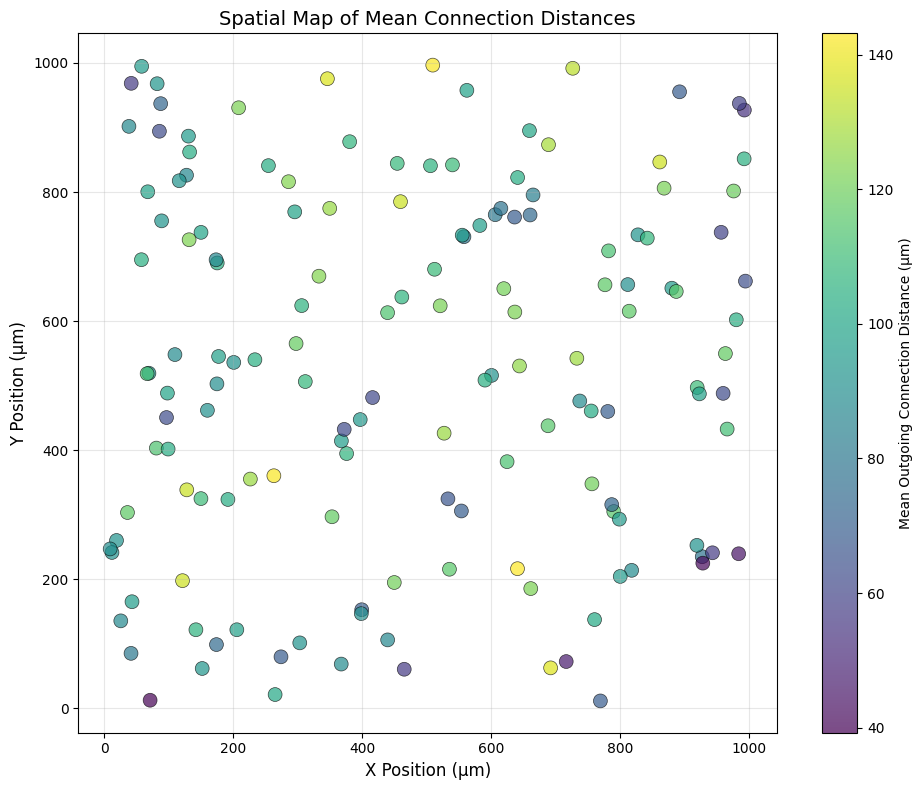

In [15]:
# Calculate mean outgoing connection distance for each neuron
def calculate_mean_outgoing_distance(result, positions):
    """Calculate mean distance of outgoing connections for each neuron."""
    n_neurons = len(positions)
    pos_vals = u.get_mantissa(positions)
    mean_distances = np.zeros(n_neurons)
    
    for i in range(n_neurons):
        # Find outgoing connections from neuron i
        mask = result.pre_indices == i
        if np.any(mask):
            post_neurons = result.post_indices[mask]
            # Calculate distances
            pre_pos = pos_vals[i]
            post_pos = pos_vals[post_neurons]
            distances = np.sqrt(np.sum((post_pos - pre_pos) ** 2, axis=1))
            mean_distances[i] = np.mean(distances)
    
    return mean_distances

# Create a smaller network for visualization
n_viz = 150
positions_viz = np.random.uniform(0, 1000, (n_viz, 2)) * u.um

gaussian_viz = conn.Gaussian(
    distance_profile=GaussianProfile(sigma=100 * u.um, max_distance=300 * u.um),
    weight=Constant(1.0 * u.nS),
    seed=42
)
result_viz = gaussian_viz(
    pre_size=n_viz,
    post_size=n_viz,
    pre_positions=positions_viz,
    post_positions=positions_viz
)

mean_dists = calculate_mean_outgoing_distance(result_viz, positions_viz)
pos_viz_vals = u.get_mantissa(positions_viz)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(
    pos_viz_vals[:, 0],
    pos_viz_vals[:, 1],
    c=mean_dists,
    s=100,
    cmap='viridis',
    alpha=0.7,
    edgecolors='black',
    linewidth=0.5
)
plt.colorbar(scatter, label='Mean Outgoing Connection Distance (μm)', ax=ax)
ax.set_xlabel('X Position (μm)', fontsize=12)
ax.set_ylabel('Y Position (μm)', fontsize=12)
ax.set_title('Spatial Map of Mean Connection Distances', fontsize=14)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 6.2 Connection Visualization for Individual Neurons

Visualize connections from specific neurons:

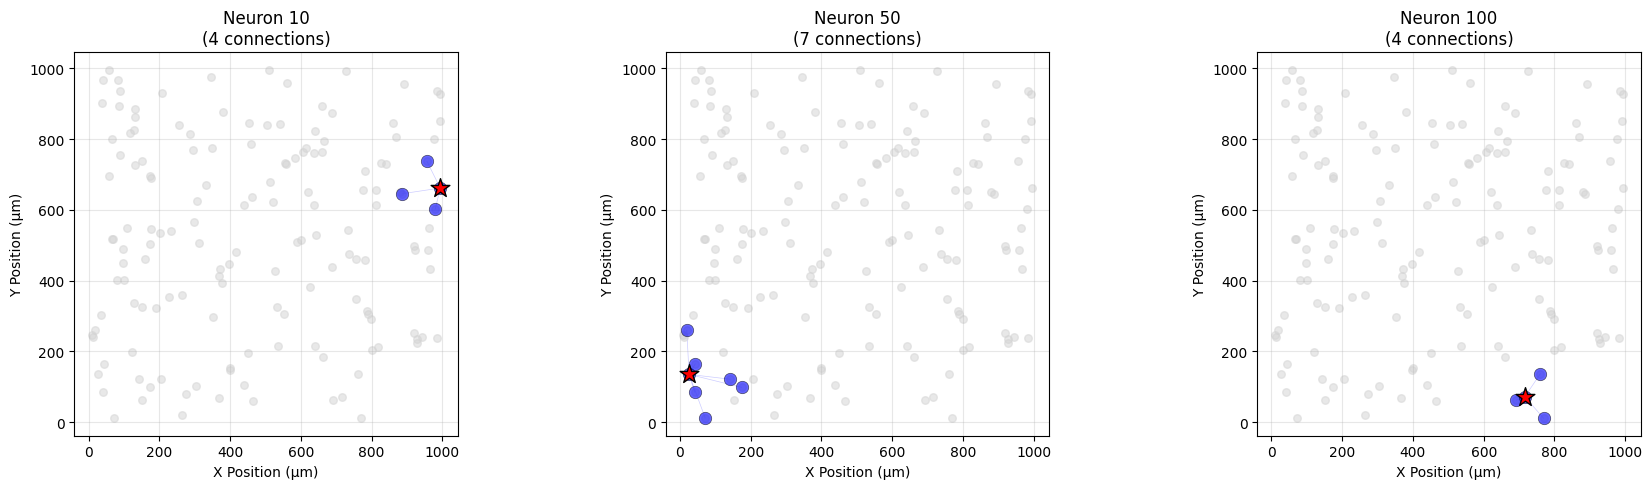

Red star: Source neuron
Blue dots: Target neurons (postsynaptic)
Gray dots: Unconnected neurons
Blue lines: Connections


In [16]:
# Select a few neurons to visualize
example_neurons = [10, 50, 100]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, neuron_id in enumerate(example_neurons):
    ax = axes[idx]
    
    # Plot all neurons in gray
    ax.scatter(pos_viz_vals[:, 0], pos_viz_vals[:, 1], 
              c='lightgray', s=30, alpha=0.5, zorder=1)
    
    # Highlight the source neuron
    ax.scatter(pos_viz_vals[neuron_id, 0], pos_viz_vals[neuron_id, 1],
              c='red', s=200, marker='*', zorder=3, edgecolors='black', linewidth=1)
    
    # Find and plot target neurons
    mask = result_viz.pre_indices == neuron_id
    target_neurons = result_viz.post_indices[mask]
    
    if len(target_neurons) > 0:
        ax.scatter(pos_viz_vals[target_neurons, 0], pos_viz_vals[target_neurons, 1],
                  c='blue', s=80, alpha=0.6, zorder=2, edgecolors='black', linewidth=0.5)
        
        # Draw connection lines
        for target in target_neurons:
            ax.plot([pos_viz_vals[neuron_id, 0], pos_viz_vals[target, 0]],
                   [pos_viz_vals[neuron_id, 1], pos_viz_vals[target, 1]],
                   'b-', alpha=0.2, linewidth=0.5, zorder=0)
    
    ax.set_xlabel('X Position (μm)')
    ax.set_ylabel('Y Position (μm)')
    ax.set_title(f'Neuron {neuron_id}\n({len(target_neurons)} connections)')
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Red star: Source neuron")
print("Blue dots: Target neurons (postsynaptic)")
print("Gray dots: Unconnected neurons")
print("Blue lines: Connections")

### 6.3 Connectivity Matrix for Grid Topology

Grid topologies create structured connectivity matrices:

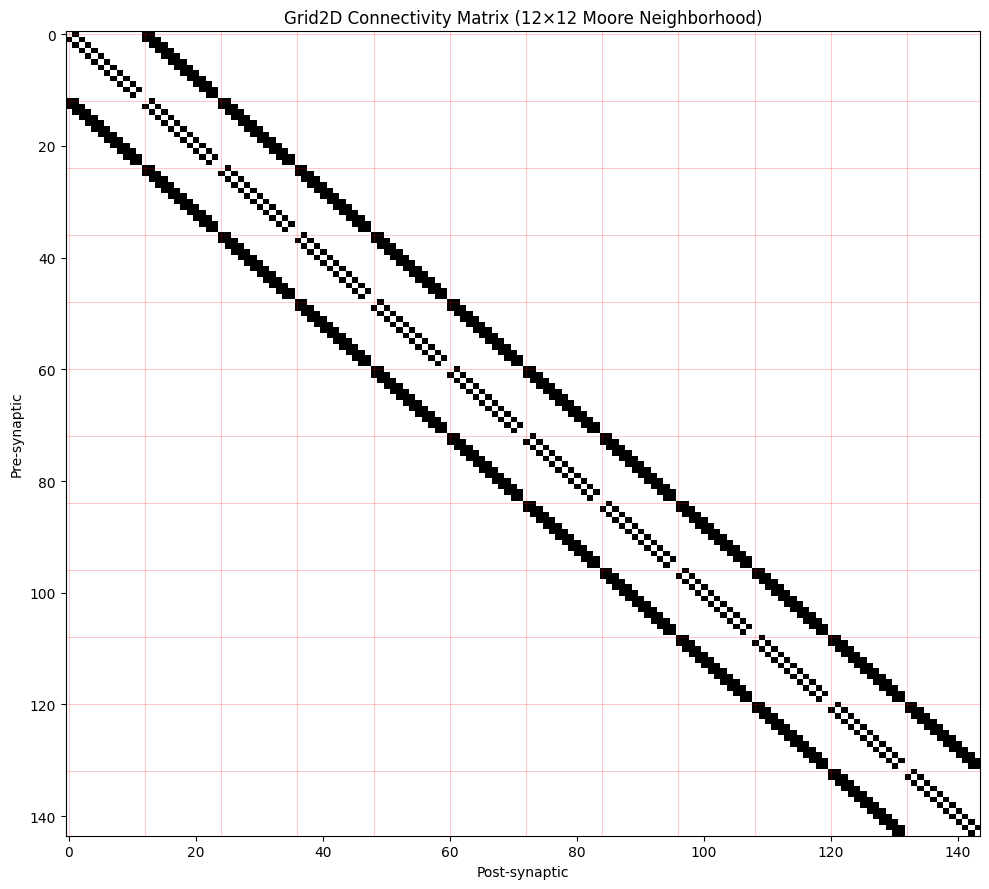


The block-diagonal structure reflects local connectivity.
Red lines separate the 12 rows/columns of the 2D grid.


In [17]:
# Create small grid for visualization
grid_small = conn.Grid2d(
    connectivity='moore',
    weight=Constant(1.0 * u.nS),
    periodic=False
)

result_grid_small = grid_small(pre_size=(12, 12), post_size=(12, 12))

# Create connectivity matrix
n_total = 144
conn_matrix = np.zeros((n_total, n_total))
conn_matrix[result_grid_small.pre_indices, result_grid_small.post_indices] = 1

# Plot
fig, ax = plt.subplots(figsize=(10, 9))
vis.connectivity_matrix(
    conn_matrix,
    cmap='binary',
    center_zero=False,
    show_colorbar=False,
    ax=ax,
    title='Grid2D Connectivity Matrix (12×12 Moore Neighborhood)'
)

# Add grid lines to show structure
for i in range(0, n_total, 12):
    ax.axhline(i, color='red', linewidth=0.5, alpha=0.3)
    ax.axvline(i, color='red', linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nThe block-diagonal structure reflects local connectivity.")
print("Red lines separate the 12 rows/columns of the 2D grid.")

### 6.4 Degree Distribution in Spatial Networks

Compare degree distributions across different spatial patterns:

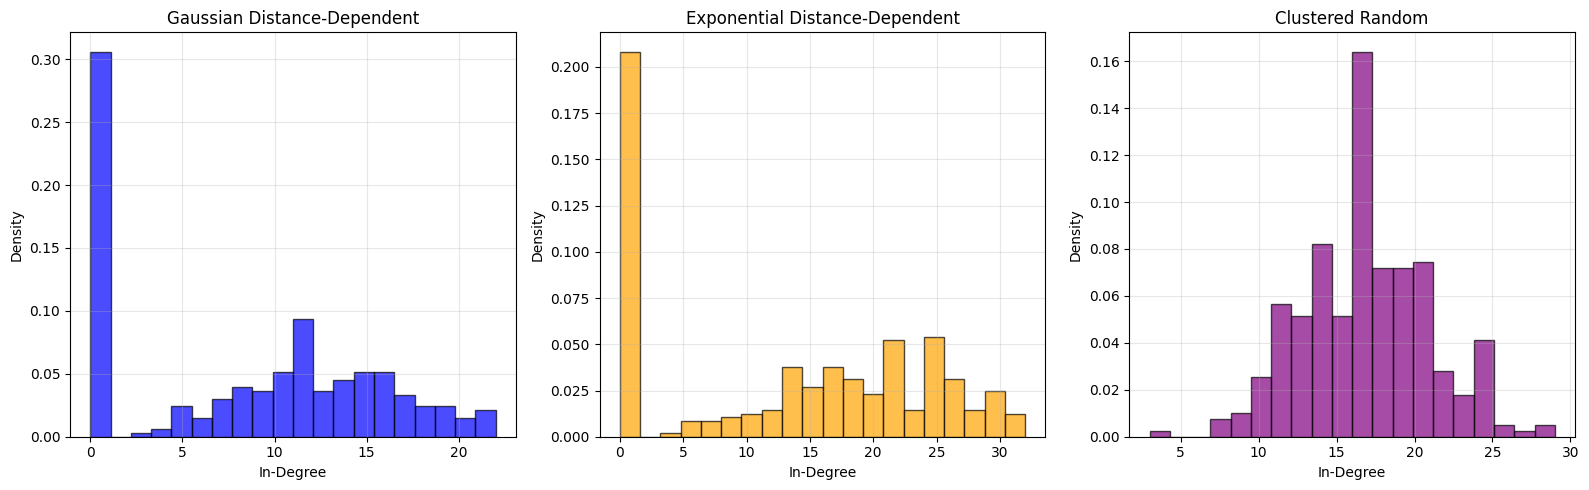


Degree distribution characteristics:
Gaussian - CV: 0.826
Exponential - CV: 0.813
Clustered - CV: 0.242

CV = Coefficient of Variation (std/mean)
Higher CV indicates more heterogeneity in connectivity.


In [19]:
# Calculate in-degrees for different patterns
def get_in_degrees(result, n_neurons):
    return np.bincount(result.post_indices, minlength=n_neurons)

# Use previous results
in_deg_gaussian = get_in_degrees(result_gaussian, n_neurons)
in_deg_exponential = get_in_degrees(result_exponential, n_neurons)
in_deg_clustered = get_in_degrees(result_clustered, n_neurons)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

vis.distribution_plot(
    in_deg_gaussian,
    bins=20,
    alpha=0.7,
    colors=['blue'],
    edgecolor='black',
    ax=axes[0],
    xlabel='In-Degree',
    title='Gaussian Distance-Dependent'
)

vis.distribution_plot(
    in_deg_exponential,
    bins=20,
    alpha=0.7,
    colors=['orange'],
    edgecolor='black',
    ax=axes[1],
    xlabel='In-Degree',
    title='Exponential Distance-Dependent'
)

vis.distribution_plot(
    in_deg_clustered,
    bins=20,
    alpha=0.7,
    colors=['purple'],
    edgecolor='black',
    ax=axes[2],
    xlabel='In-Degree',
    title='Clustered Random'
)

plt.tight_layout()
plt.show()

print("\nDegree distribution characteristics:")
print(f"Gaussian - CV: {np.std(in_deg_gaussian) / np.mean(in_deg_gaussian):.3f}")
print(f"Exponential - CV: {np.std(in_deg_exponential) / np.mean(in_deg_exponential):.3f}")
print(f"Clustered - CV: {np.std(in_deg_clustered) / np.mean(in_deg_clustered):.3f}")
print("\nCV = Coefficient of Variation (std/mean)")
print("Higher CV indicates more heterogeneity in connectivity.")

---

## 7. Exercises <a name="exercises"></a>

Try these exercises to reinforce your understanding:

### Exercise 1: Custom Distance Profile

Create a distance-dependent connectivity with a custom distance profile (e.g., Mexican hat):

In [ ]:
def mexican_hat_profile(distance, sigma_center=50, sigma_surround=150, amplitude_center=1.0, amplitude_surround=0.5):
    """
    Mexican hat (difference of Gaussians) distance profile.
    
    Creates excitatory center and inhibitory surround.
    
    Parameters
    ----------
    distance : array
        Distances in μm
    sigma_center, sigma_surround : float
        Standard deviations of center and surround Gaussians
    amplitude_center, amplitude_surround : float
        Amplitudes of center and surround
    
    Returns
    -------
    probability : array
        Connection probability for each distance
    """
    # YOUR CODE HERE
    # Hint: DoG = amplitude_center * exp(-d²/2σ_c²) - amplitude_surround * exp(-d²/2σ_s²)
    
    pass

# Test your profile
# distances = np.linspace(0, 500, 1000)
# probs = mexican_hat_profile(distances)
# 
# plt.figure(figsize=(10, 6))
# plt.plot(distances, probs, linewidth=2)
# plt.axhline(0, color='black', linestyle='--', alpha=0.3)
# plt.xlabel('Distance (μm)')
# plt.ylabel('Connection Probability')
# plt.title('Mexican Hat Distance Profile')
# plt.grid(True, alpha=0.3)
# plt.show()

### Exercise 2: Spatial Clustering Analysis

Analyze whether a connectivity pattern exhibits spatial clustering:

In [ ]:
def analyze_spatial_clustering(result, positions, n_bins=10):
    """
    Analyze spatial clustering by comparing observed vs. expected distance distribution.
    
    Parameters
    ----------
    result : ConnectionResult
        Connectivity result
    positions : array
        Neuron positions
    n_bins : int
        Number of distance bins
    
    Returns
    -------
    clustering_index : float
        Positive indicates local clustering, negative indicates anti-clustering
    """
    # YOUR CODE HERE
    # Hint:
    # 1. Calculate actual connection distances
    # 2. Calculate all possible pairwise distances
    # 3. Compare distributions (e.g., mean distance ratio)
    
    pass

# Test on different patterns
# clustering_gaussian = analyze_spatial_clustering(result_gaussian, positions)
# clustering_random = analyze_spatial_clustering(result_random, positions)
# 
# print(f"Gaussian pattern clustering index: {clustering_gaussian:.3f}")
# print(f"Random pattern clustering index: {clustering_random:.3f}")

### Exercise 3: Topographic Mapping

Create a topographic mapping between two populations (e.g., retinotopic projection):

In [ ]:
def create_topographic_map(source_positions, target_positions, sigma, weight_init):
    """
    Create topographic mapping where nearby neurons in source connect to 
    nearby neurons in target.
    
    Parameters
    ----------
    source_positions : array
        Source population positions
    target_positions : array
        Target population positions  
    sigma : Quantity
        Gaussian width for topographic spread
    weight_init : Initializer
        Weight initialization
    
    Returns
    -------
    result : ConnectionResult
        Topographic connectivity
    """
    # YOUR CODE HERE
    # Hint: Use Gaussian distance-dependent connectivity between
    # source and target populations
    
    pass

# Test topographic mapping
# # Create two 2D grids (e.g., retina and V1)
# retina_pos = create_grid_positions(20, 20, spacing=50) * u.um  # 20×20 grid
# v1_pos = create_grid_positions(30, 30, spacing=30) * u.um      # 30×30 grid (magnification)
# 
# topo_result = create_topographic_map(
#     retina_pos, v1_pos, 
#     sigma=100*u.um, 
#     weight_init=Constant(1.0*u.nS)
# )
# 
# print(f"Topographic projection: {len(topo_result.pre_indices)} connections")